In [1]:
import os
import re
import numpy as np
from struct import unpack, pack
import sys

model_fp = open("/home/tom418/human_ref/human_g1k_v37.fasta.suffixarray_uint64_L1_PARAMETERS","rb")
size = 67108864

l2_models = []
print("Loading Start!")    
for i in range(size):
    val1 = unpack("<d",model_fp.read(8))
    val2 = unpack("<d",model_fp.read(8))
    val3 = unpack("Q",model_fp.read(8))
    
    l2_models.append((val1[0] , val2[0], val3[0] ))
print("Loading Done!")    


Loading Start!
Loading Done!


In [2]:
print(l2_models[0]) # First model 1:1.31868e+06 First model 2:1.12277e-05 First model 3:1.08735e-317

(1318683.4472783513, 1.12276816047524e-05, 2200830)


In [3]:

fp = open("/home/tom418/human_ref/human_g1k_v37.fasta.suffixarray_uint64","rb")
size = unpack("Q",fp.read(8))
fp.close()
print("Loading Start!")   
datas = np.memmap("/home/tom418/human_ref/human_g1k_v37.fasta.suffixarray_uint64", dtype='uint64', mode='r', shape=(size))
print("Loading Done!")   
datas = np.delete(datas,0)
# datas = np.empty(size[0], dtype=np.uint64)
# print("Loading Start!")   
# for i in range(size[0]):
#     val = unpack("Q",fp.read(8))[0]
#     datas[i]= val
# print("Loading Done!")    

Loading Start!
Loading Done!


In [ ]:
l_datas = []
print("Done")

In [6]:
# lets first find how distribution of 2^26 buckets
# how much data exists in each bucket
# store the last key index per each k-mer
buckets = [-1 for i in range(67108864)]
print("Loading Start!")   
for idx,elem in enumerate(datas):
    if idx % 10000000 == 1:
        print("idx",idx," Done.")
    buckets[elem>>np.uint64(38)] = idx
print("Loading Done!")   


Loading Start!
idx 1  Done.
idx 1000001  Done.
idx 2000001  Done.
idx 3000001  Done.
idx 4000001  Done.
idx 5000001  Done.
idx 6000001  Done.
idx 7000001  Done.
idx 8000001  Done.
idx 9000001  Done.
idx 10000001  Done.
idx 11000001  Done.
idx 12000001  Done.
idx 13000001  Done.
idx 14000001  Done.
idx 15000001  Done.
idx 16000001  Done.
idx 17000001  Done.
idx 18000001  Done.
idx 19000001  Done.
idx 20000001  Done.
idx 21000001  Done.
idx 22000001  Done.
idx 23000001  Done.
idx 24000001  Done.
idx 25000001  Done.
idx 26000001  Done.
idx 27000001  Done.
idx 28000001  Done.
idx 29000001  Done.
idx 30000001  Done.
idx 31000001  Done.
idx 32000001  Done.
idx 33000001  Done.
idx 34000001  Done.
idx 35000001  Done.
idx 36000001  Done.
idx 37000001  Done.
idx 38000001  Done.
idx 39000001  Done.
idx 40000001  Done.
idx 41000001  Done.
Loading Done!


In [6]:
buckets_key_num = [0 for i in range(67108864)]
last_buc = 0 
for idx,buc in enumerate(buckets):
    if buc != - 1:
        buckets_key_num[idx] = buc-last_buc
        last_buc = buc


In [61]:
lookup_stop = 5000
import heapq
list_of_largest = heapq.nlargest(lookup_stop, buckets_key_num)
print("{}%, {} of 67108864 models".format(lookup_stop/67108864.0*100.0, lookup_stop ), "Occupies Percentage of keys:" , 100.0 * sum(list_of_largest) / float(5800000000) , "\n",list_of_largest) 

# for buc in sorted(buckets, reverse = True)[:lookup_stop]:
#     print("Number of keys: ",buc)
    

0.007450580596923828%, 5000 of 67108864 models Occupies Percentage of keys: 5.325914775862069 
 [3455709, 3455709, 866588, 866588, 818058, 818058, 684093, 684093, 680996, 680996, 571004, 571004, 517771, 517771, 490625, 490625, 486902, 486902, 483260, 483260, 471565, 471565, 468771, 468771, 466100, 466100, 464140, 464140, 462888, 462888, 462564, 462564, 457616, 457616, 451930, 451930, 451494, 451494, 450486, 450486, 445690, 445690, 444837, 444837, 440681, 440681, 440440, 440440, 438355, 438355, 432925, 432925, 424853, 424853, 423939, 423939, 415003, 415003, 414461, 414461, 398219, 398219, 397708, 397708, 397486, 397486, 394848, 394848, 392544, 392544, 389907, 389907, 388238, 388238, 388173, 388173, 387803, 387803, 385329, 385329, 383287, 383287, 381521, 381521, 379814, 379814, 377448, 377448, 376049, 376049, 374755, 374755, 369612, 369612, 342893, 342893, 328581, 328581, 321826, 321826, 320939, 320939, 320243, 320243, 320001, 320001, 309840, 309840, 307689, 307689, 305677, 305677, 28704

In [63]:
find_this = 866588
for idx,elem in  enumerate(buckets_key_num):
    if elem == find_this:
        print("Index:", idx)
#     if elem > 10000:
#         print(idx)
#     if elem == 0:
#         print("Empty bucket idx:", idx)
print("Done")

Index: 4473924
Index: 62634939
Done


In [66]:
print(buckets[4473923],buckets[4473924])

627075499 627942087


In [67]:

print("{0:064b}".format(datas[0]))
print("{0:064b}\n".format(datas[3455709]))

print("{0:064b}".format(datas[3455710]))
print("{0:064b}\n".format(datas[3558419]))

print("{0:064b}".format(datas[3558420]))
print("{0:064b}\n".format(datas[3950963]))

print("{0:064b}".format(datas[22377779]))
print("{0:064b}\n".format(datas[22377780]))


for i in range(0, 3455709, 70000):
    print(i,": {0:064b}".format(datas[i]))
print(i,": {0:064b}".format(datas[3455709]))
for i in range(627075500 , 627942087, 10000):
    print(i,": {0:064b}".format(datas[i]))
print(i,": {0:064b}".format(datas[3558419]))

0000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000011111111111111111111111111111111111111

0000000000000000000000000100000000000000000000000000000000000000
0000000000000000000000000111111111111111111111111111111111111111

0000000000000000000000001000000000000000000000000000000000000000
0000000000000000000000001011111111111111111111111111111111111111

0000000000010110011001011011101001101010001010011000100001001110
0000000000010110011001100010011010001000001001001010100101111010

0 : 0000000000000000000000000000000000000000000000000000000000000000
70000 : 0000000000000000000000000000000000000000000000000000000000000010
140000 : 0000000000000000000000000000000000000000000000000000000011100000
210000 : 0000000000000000000000000000000000000000000000000000101000110000
280000 : 0000000000000000000000000000000000000000000000000011010011100111
350000 : 0000000000000000000000000000000000000000000000001011111111101000
420000 : 00000000000000000000000000000

In [47]:
print("Number of Keys\tError value")
for i in range(0,10):
    if i==0:
        print("Keynum:",buckets_key_num[i],"Error:",l2_models[i][2])
        print("\t","True Pos:",0,"Pred Pos:", datas[0] *l2_models[i][1] + l2_models[i][0], "Error:", abs(datas[0] *l2_models[i][1] + l2_models[i][0] - 0))
        print("\t","True Pos:",buckets[i],"Pred Pos:", datas[buckets[i]] *l2_models[i][1] + l2_models[i][0] ,"Error:", abs(datas[buckets[i]] *l2_models[i][1] + l2_models[i][0]-buckets[i]))
        print("\t","True Pos:",buckets[i]+1, "Pred Pos:",datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0],"Error:", abs(datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i]-1) )
    else:
        print("Keynum:",buckets_key_num[i],"Error:",l2_models[i][2])
        print("\t","True Pos:",buckets[i-1],"Pred Pos:", datas[buckets[i-1]] *l2_models[i][1] + l2_models[i][0],"Error:", abs(datas[buckets[i-1]] *l2_models[i][1] + l2_models[i][0]-buckets[i-1]))
        print("\t","True Pos:",buckets[i-1]+1,"Pred Pos:", datas[buckets[i-1]+1] *l2_models[i][1] + l2_models[i][0],"Error:", abs(datas[buckets[i-1]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i-1]-1) )
        print("\t","True Pos:",buckets[i], "Pred Pos:",datas[buckets[i]] *l2_models[i][1] + l2_models[i][0],"Error:", abs(datas[buckets[i]] *l2_models[i][1] + l2_models[i][0]-buckets[i]) )
        print("\t","True Pos:",buckets[i]+1, "Pred Pos:",datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0],"Error:", abs(datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i]-1) )
    
    


Number of Keys	Error value
Keynum: 3455709 Error: 2200830
	 True Pos: 0 Pred Pos: 1318683.4472783513 Error: 1318683.4472783513
	 True Pos: 3455709 Pred Pos: 4404925.066615115 Error: 949216.0666151149
	 True Pos: 3455710 Pred Pos: 4404925.066626342 Error: 949215.066626342
Keynum: 102710 Error: 22154
	 True Pos: 3455709 Pred Pos: 3477789.3656393383 Error: 22080.36563933827
	 True Pos: 3455710 Pred Pos: 3477789.3656396493 Error: 22079.36563964933
	 True Pos: 3558419 Pred Pos: 3563335.5590408146 Error: 4916.559040814638
	 True Pos: 3558420 Pred Pos: 3563335.5590411257 Error: 4915.5590411257
Keynum: 392544 Error: 92224
	 True Pos: 3558419 Pred Pos: 3649118.8205272583 Error: 90699.82052725833
	 True Pos: 3558420 Pred Pos: 3649118.820528473 Error: 90698.82052847277
	 True Pos: 3950963 Pred Pos: 3982922.653847115 Error: 31959.653847115114
	 True Pos: 3950964 Pred Pos: 3982922.653848329 Error: 31958.653848329093
Keynum: 178262 Error: 27089
	 True Pos: 3950963 Pred Pos: 3946964.1258300324 Error:

In [4]:
import pickle
# with open('buckets.pickle', 'wb') as f:
#     pickle.dump(buckets, f, pickle.HIGHEST_PROTOCOL)

with open('buckets.pickle', 'rb') as f:
    buckets = pickle.load(f)

Generating avg buckets
Plot bar graph len: 13422


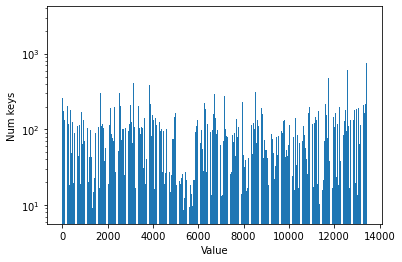

Done


In [108]:
import matplotlib.pyplot as plt
#3455709
avg_buckets = []
sum_val = 0
sum_num = 0
print("Generating avg buckets")
for elem in buckets_key_num:
    sum_val += elem
    sum_num +=1
    if sum_num == 5000:
        avg_buckets.append(float(sum_val)/sum_num)
        sum_val = 0
        sum_num = 0
avg_buckets.append(float(sum_val)/sum_num)
print("Plot bar graph len:", len(avg_buckets))
labels =  np.arange(len(avg_buckets))
plt.bar(labels,avg_buckets)
plt.xlabel('Value')
plt.yscale("log")
plt.ylabel('Num keys')
plt.show()
print("Done")

Plot bar graph len: 101


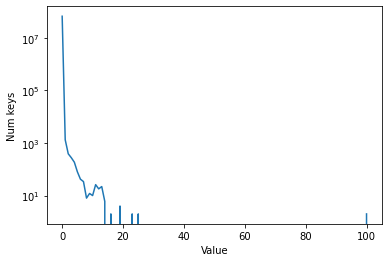

Done


In [59]:
max_no_bucket = 3455709
avg_buckets = [0] * 101

for elem in buckets_key_num:
    idx = int(elem * 100 / max_no_bucket)
    avg_buckets[idx] += 1

import matplotlib.pyplot as plt

# avg_buckets.append(float(sum_val)/sum_num)
print("Plot bar graph len:", len(avg_buckets))
labels =  np.arange(len(avg_buckets))
plt.plot(labels,avg_buckets)
plt.xlabel('Value')
plt.yscale("log")
plt.ylabel('Num keys')
plt.show()
print("Done")

In [ ]:

Counts = 0
i=0
for idx, elem in enumerate(buckets_key_num):

    for i in range(idx,0,-1):
        if buckets[i] != -1:
            break
            
    if (buckets_key_num[i]< 100):
        continue
        
    for last_i in range(i-1,0,-1):
        if buckets[last_i] != -1:
            break
            
    
    lastoflast = abs(datas[buckets[last_i]] *l2_models[i][1] + l2_models[i][0]-buckets[last_i])
    firstofcurr = abs(datas[buckets[last_i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[last_i]-1)
    lastofcurr = abs(datas[buckets[i]] *l2_models[i][1] + l2_models[i][0]-buckets[i])
    firstofnext = abs(datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i]-1)
    if (lastoflast > 5 or firstofnext > 5 )  and ( (lastoflast >firstofcurr *1.5 + 1  and lastoflast>firstofnext) or (firstofnext > lastofcurr*1.5+1 and firstofnext>lastoflast) ) :
        pass
    else:
        continue

    
    Counts+=1
    print("\nCounts:",Counts, "Total:",idx,"Max Key Index",buckets[i], "Min Key Index", buckets[last_i]+1)
    print("Last: {0:064b}".format(datas[buckets[last_i]]))
    print("Curr: {0:064b}".format(datas[buckets[i]]))
    print("Next: {0:064b}".format(datas[buckets[i]+1]))

    print("key num:",buckets_key_num[i], "Error val:", l2_models[i][2],"\n",
    abs(datas[buckets[last_i]] *l2_models[i][1] + l2_models[i][0]-buckets[last_i]) ,
    abs(datas[buckets[last_i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[last_i]-1),
    abs(datas[buckets[i]] *l2_models[i][1] + l2_models[i][0]-buckets[i]),
    abs(datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i]-1)

        )
print("Done")


Counts: 1 Total: 391 Max Key Index 7503659 Min Key Index 7503547
Last: 0000000000000000011000011011101001010110010111101010101010000001
Curr: 0000000000000000011000011111111111111010010111111011111011011111
Next: 0000000000000000011000100000000000000000000000000010000000100000
key num: 113 Error val: 17 
 13.577824614942074 4.9832289312034845 9.750332212075591 10.713461679406464



In [110]:
max_count =0
max_idx =0
for idx, elem in enumerate(buckets_key_num):
    if elem !=0:
        count =0
    else:
        count += 1
        if max_count < count:
            max_idx = idx
            max_count = count
print(max_idx, max_count)

25584429 38


In [123]:
buckets_key_num[25584430]
buckets[25584391]
i = 25584430
last_i= 25584391

print("{0:064b}".format(datas[buckets[i]]))
print("{0:064b}".format(datas[buckets[last_i]]))


print("key num:",buckets_key_num[i], "Error val:", l2_models[i][2],"\n",
abs(datas[buckets[last_i]] *l2_models[i][1] + l2_models[i][0]-buckets[last_i]) ,
abs(datas[buckets[last_i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[last_i]-1),
abs(datas[buckets[i]] *l2_models[i][1] + l2_models[i][0]-buckets[i]),
abs(datas[buckets[i]+1] *l2_models[i][1] + l2_models[i][0]-buckets[i]-1)

)


0110000110011000110010111000010011001111101110101000100111100011
0110000110011000110000011111110011101101111000110100101110010000
key num: 1 Error val: 3 
 0.032703399658203125 0.6159391403198242 0.6159391403198242 0.29161787033081055
